In [83]:
#Imports
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold, ShuffleSplit, GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import xgboost as xgb
from PIL import Image, ImageOps
from PIL import ImageOps

In [69]:
df = pd.read_csv("NCAA Champion RawData.csv")
df.head(2)

,Season,#,Team/Season,Team,Conference,Conference/Season,Bracket Region,Bracket Region/Season,sum conf L1Y cs,sum conf L3Y cs,...,poll_Week 17,poll_Week 18,poll_avg,top_12_Week 12,team_rating_avg_custom,max_player_rating_custom,cf_rating_custom,region_rating_custom,champion share,champion
0,2023,2,Houston 2023,Houston,AAC,AAC 2023,midwest,midwest 2023,0.666667,1.833333,...,25,25,23.888889,1,67.197222,78.588889,24.906349,34.827107,0.333333,0
1,2023,6,Alabama 2023,Alabama,SEC,SEC 2023,south,south 2023,0.833333,4.000000,...,24,22,18.833333,1,51.548958,72.458333,26.599414,33.940295,0.333333,0


In [70]:
df = pd.read_csv("NCAA Champion RawData.csv")

exclude_columns = ['Season', '#', 'Team', 'Conference', 'Conference/Season', 'Team/Season',
                   'Bracket Region', 'Bracket Region/Season','champion share', 'champion', 'Seed_Tournament', 'Seed_1' , 'Seed_2', 'Seed_3', 'Seed_4', 'make tournament','top_12_Week 12']

reverse_rank_columns = ['DRtg']

for col in df.columns:
    if col not in exclude_columns:
        if col in reverse_rank_columns:
            df[col] = df.groupby('Season')[col].rank(method='min', ascending=True)
        else:
            df[col] = df.groupby('Season')[col].rank(method='min', ascending=False)

df.to_csv("NCAA Champion LR Data.csv", index=False)

print("NCAA Champion LR Data.csv'")

NCAA Champion LR Data.csv'


In [84]:
df = pd.read_csv("NCAA Champion LR Data.csv")
print(list(df.columns))

['Season', '#', 'Team/Season', 'Team', 'Conference', 'Conference/Season', 'Bracket Region', 'Bracket Region/Season', 'sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L10Y cs', 'sum school L1Y cs', 'sum school L2Y cs', 'sum school L4Y cs', 'sum school L6Y cs', 'sum school L8Y cs', 'sum school L10Y cs', 'sum school champion', 'sum school E8 apps', 'sum school F4 apps', 'sum school Finals apps', 'TS%', 'eFG%', 'Total S%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'PPS', 'FIC40', 'ORtg', 'DRtg', 'eDiff', 'Poss', 'Pace', 'Dbl Dbl', 'Tpl Dbl', '40 Pts', '20 Reb', '20 Ast', '5 Stl', '5 Blk', 'High Game', 'MOV', 'Techs', 'HOB', 'Ast/TO', 'Stl/TO', 'FT/FGA', "W's", "L's", 'Win %', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG', 'TOV', 'PF', 'Seed_Tournament', 'Seed_1', 'Seed_2', 'Seed_3', 'Seed_4', 'make tournament', 'sum mm tour games', 'sum cf tour games', 'sum cf re

In [72]:
df

,Season,#,Team/Season,Team,Conference,Conference/Season,Bracket Region,Bracket Region/Season,sum conf L1Y cs,sum conf L3Y cs,...,poll_Week 17,poll_Week 18,poll_avg,top_12_Week 12,team_rating_avg_custom,max_player_rating_custom,cf_rating_custom,region_rating_custom,champion share,champion
0,2023,2,Houston 2023,Houston,AAC,AAC 2023,midwest,midwest 2023,33.0,37.0,...,1.0,1.0,1.0,1,1.0,2.0,39.0,16.0,0.333333,0
1,2023,6,Alabama 2023,Alabama,SEC,SEC 2023,south,south 2023,26.0,21.0,...,2.0,4.0,4.0,1,7.0,4.0,26.0,32.0,0.333333,0
2,2023,41,Purdue 2023,Purdue,Big Ten,Big Ten 2023,east,east 2023,13.0,13.0,...,5.0,5.0,3.0,1,8.0,1.0,13.0,48.0,0.000000,0
3,2023,123,Kansas 2023,Kansas,Big 12,Big 12 2023,west,west 2023,1.0,1.0,...,3.0,3.0,2.0,1,3.0,9.0,1.0,1.0,0.166667,0
4,2023,16,UCLA 2023,UCLA,Pac-12,Pac-12 2023,west,west 2023,33.0,28.0,...,4.0,2.0,8.0,0,2.0,5.0,33.0,1.0,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,2003,48,Utah State 2003,Utah State,Big West,Big West 2003,west,west 2003,1.0,1.0,...,25.0,25.0,40.0,0,45.0,58.0,59.0,1.0,0.000000,0
1261,2003,43,South Carolina State 2003,South Carolina State,MEAC,MEAC 2003,east,east 2003,1.0,1.0,...,25.0,25.0,40.0,0,63.0,63.0,64.0,49.0,0.000000,0
1262,2003,37,IUPUI 2003,IUPUI,Summit,Summit 2003,midwest,midwest 2003,1.0,1.0,...,25.0,25.0,40.0,0,52.0,54.0,54.0,17.0,0.000000,0
1263,2003,73,Vermont 2003,Vermont,AM East,AM East 2003,west,west 2003,1.0,1.0,...,25.0,25.0,40.0,0,38.0,30.0,57.0,1.0,0.000000,0


In [73]:
#df.drop(df[df['Season'] < 2005].index, inplace = True)
#df

In [8]:
data_columns = ['sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L10Y cs', 'sum school L1Y cs', 'sum school L2Y cs', 'sum school L4Y cs', 'sum school L6Y cs', 'sum school L8Y cs', 'sum school L10Y cs', 'sum school champion', 'sum school E8 apps', 'sum school F4 apps', 'sum school Finals apps', 'TS%', 'eFG%', 'Total S%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'PPS', 'FIC40', 'ORtg', 'DRtg', 'eDiff', 'Poss', 'Pace', 'Dbl Dbl', 'Tpl Dbl', '40 Pts', '20 Reb', '20 Ast', '5 Stl', '5 Blk', 'High Game', 'MOV', 'Techs', 'HOB', 'Ast/TO', 'Stl/TO', 'FT/FGA', "W's", "L's", 'Win %', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG', 'TOV', 'PF', 'Seed_Tournament', 'Seed_1', 'Seed_2', 'Seed_3', 'Seed_4', 'make tournament', 'sum mm tour games', 'sum cf tour games', 'sum cf reg games', 'sum career games', 'sum polls made', 'poll_Pre 1', 'poll_Week 2', 'poll_Week 3', 'poll_Week 4', 'poll_Week 5', 'poll_Week 6', 'poll_Week 7', 'poll_Week 8', 'poll_Week 9', 'poll_Week 10', 'poll_Week 11', 'poll_Week 12', 'poll_Week 13', 'poll_Week 14', 'poll_Week 15', 'poll_Week 16', 'poll_Week 17', 'poll_Week 18', 'poll_avg', 'top_12_Week 12', 'team_rating_avg_custom', 'max_player_rating_custom', 'cf_rating_custom', 'region_rating_custom', 'champion share']

df= df.dropna(subset=data_columns)
data = df[data_columns].copy()

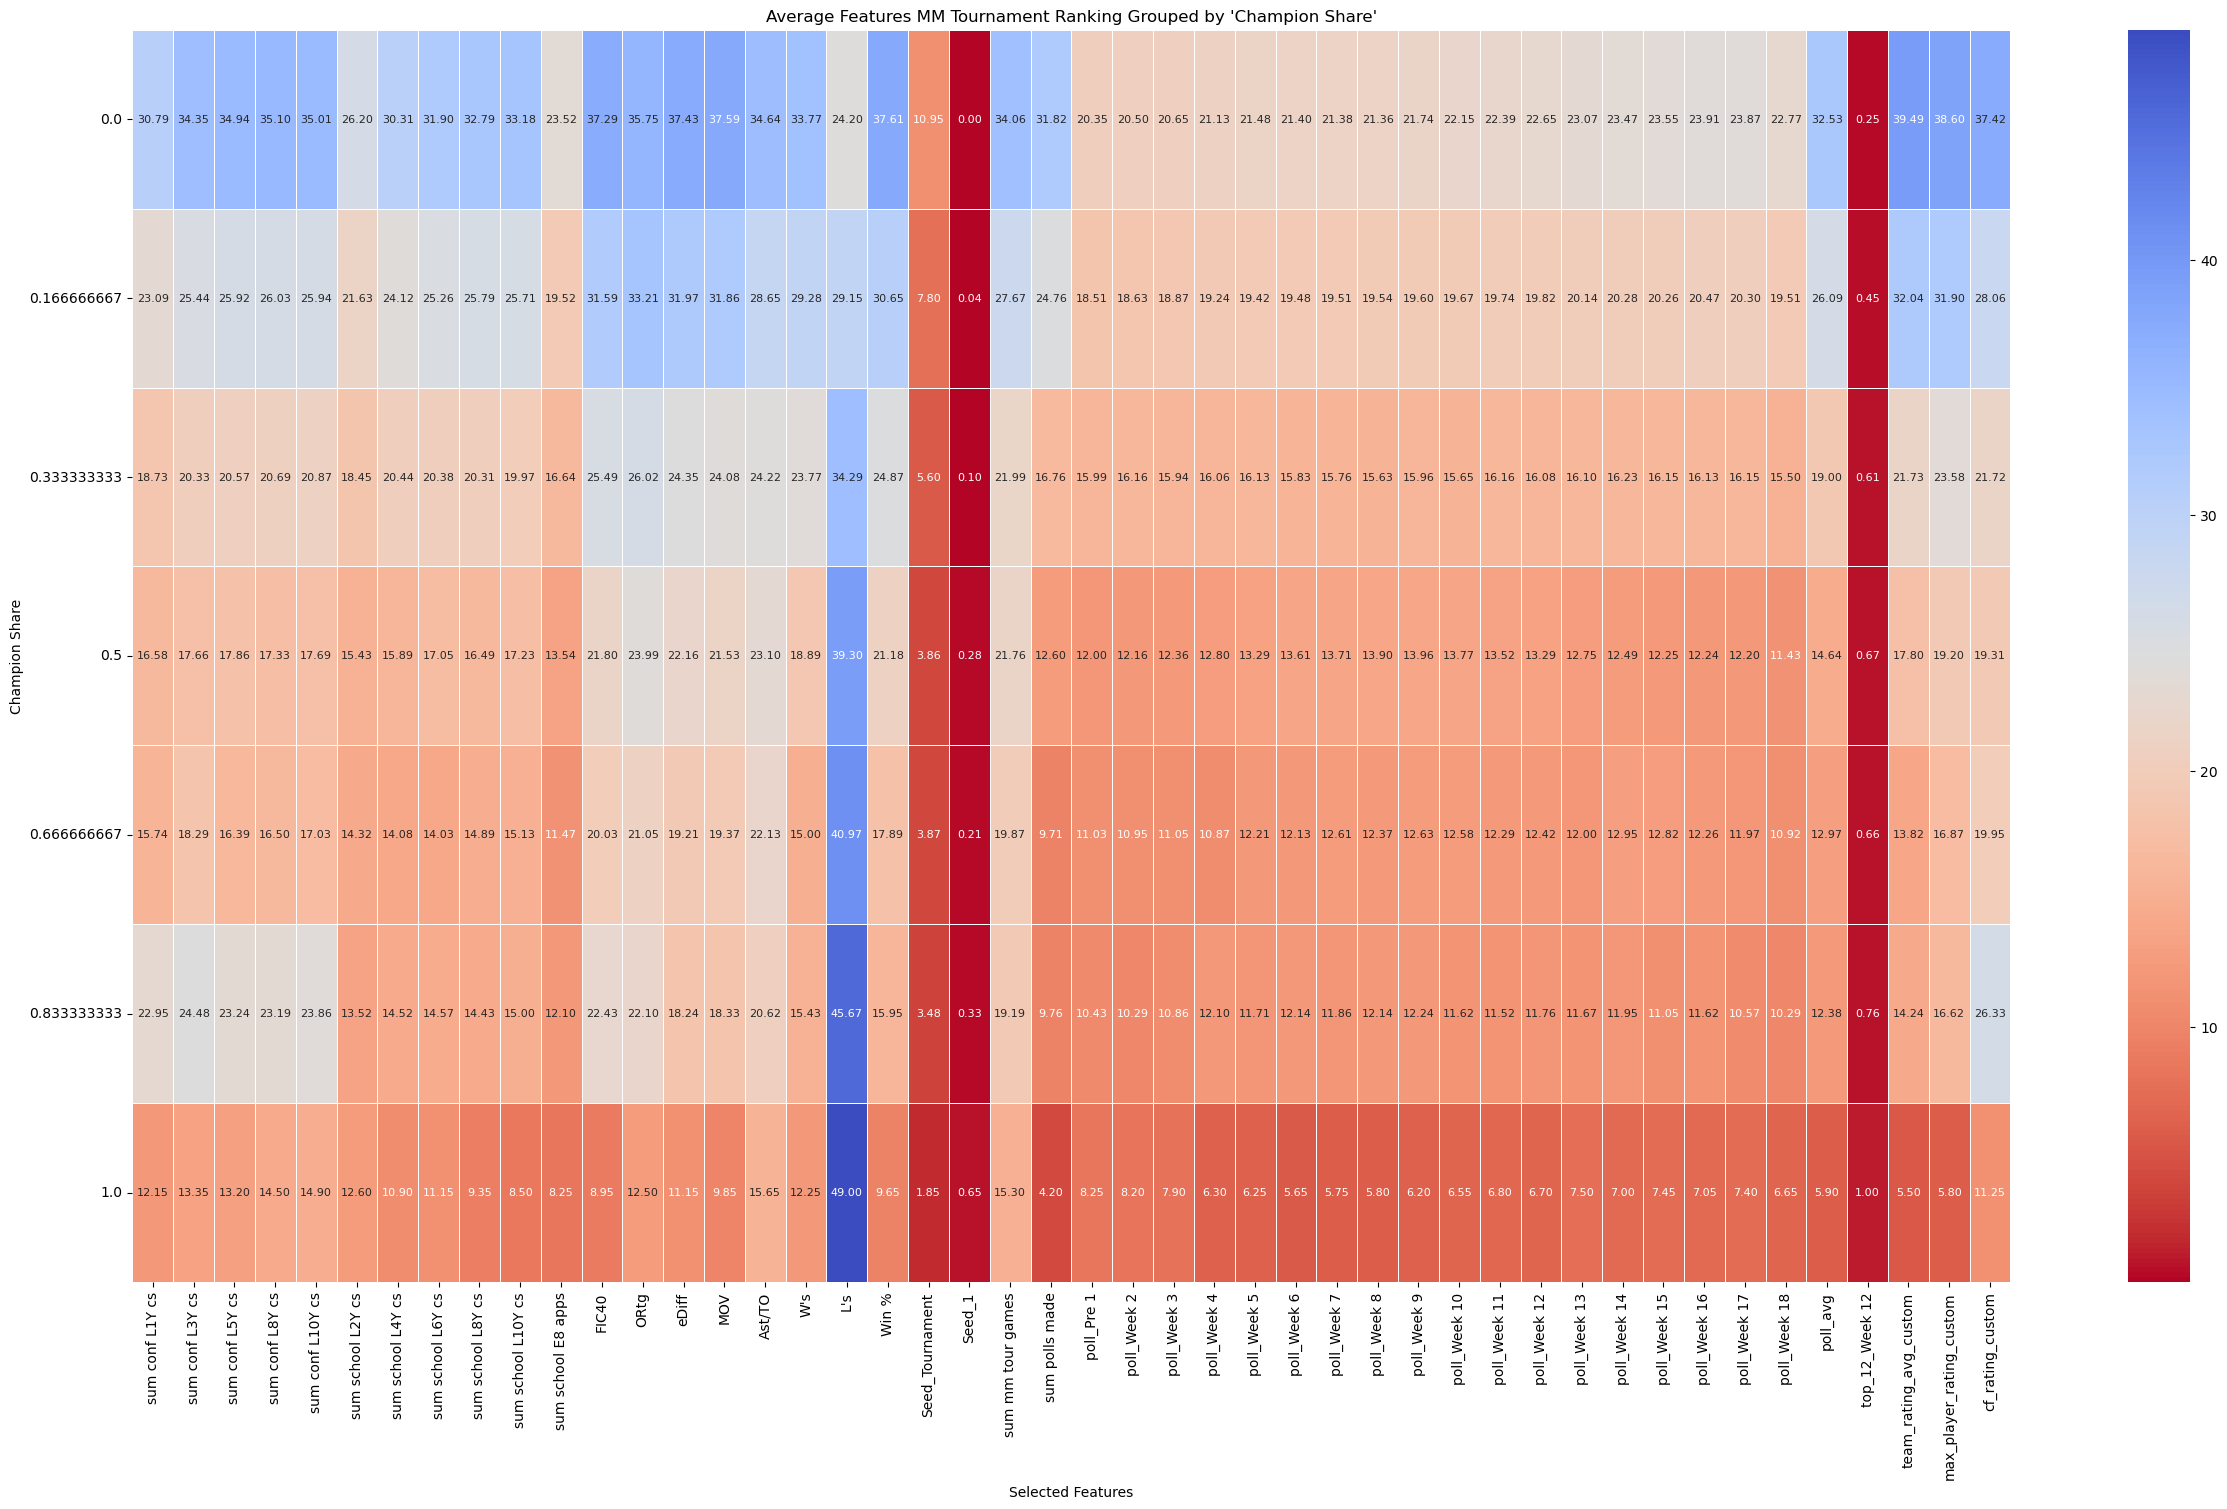

In [9]:
corr = data.corr().abs()
selected_features = corr.loc[corr['champion share']>.25].index

corr_df = data[selected_features].groupby('champion share').mean()

plt.rcParams['figure.figsize'] = (25, 15)
plt.title("Average Features MM Tournament Ranking Grouped by 'Champion Share'")
sns.heatmap(data=corr_df, cmap='coolwarm_r', annot=True, linewidth=.5, annot_kws={"size": 8}, fmt=".2f")

plt.xticks(rotation=90)  
plt.yticks(rotation=0)   

plt.tight_layout()  

plt.xlabel("Selected Features")
plt.ylabel("Champion Share")
plt.savefig("avg_fea_ht.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("avg_fea_ht.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("avg_fea_ht.png")
plt.show()

In [10]:
print("Seed")

champions_df = df[df['champion'] == 1.00]
unique_ranks = champions_df['Seed_Tournament'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['Seed_Tournament'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions seed {rank}: {percentage:.2f}%")

Seed
The percentage of champions seed Rank 1: 65.00%
The percentage of champions seed Rank 3: 15.00%
The percentage of champions seed Rank 2: 10.00%
The percentage of champions seed Rank 4: 5.00%
The percentage of champions seed Rank 7: 5.00%


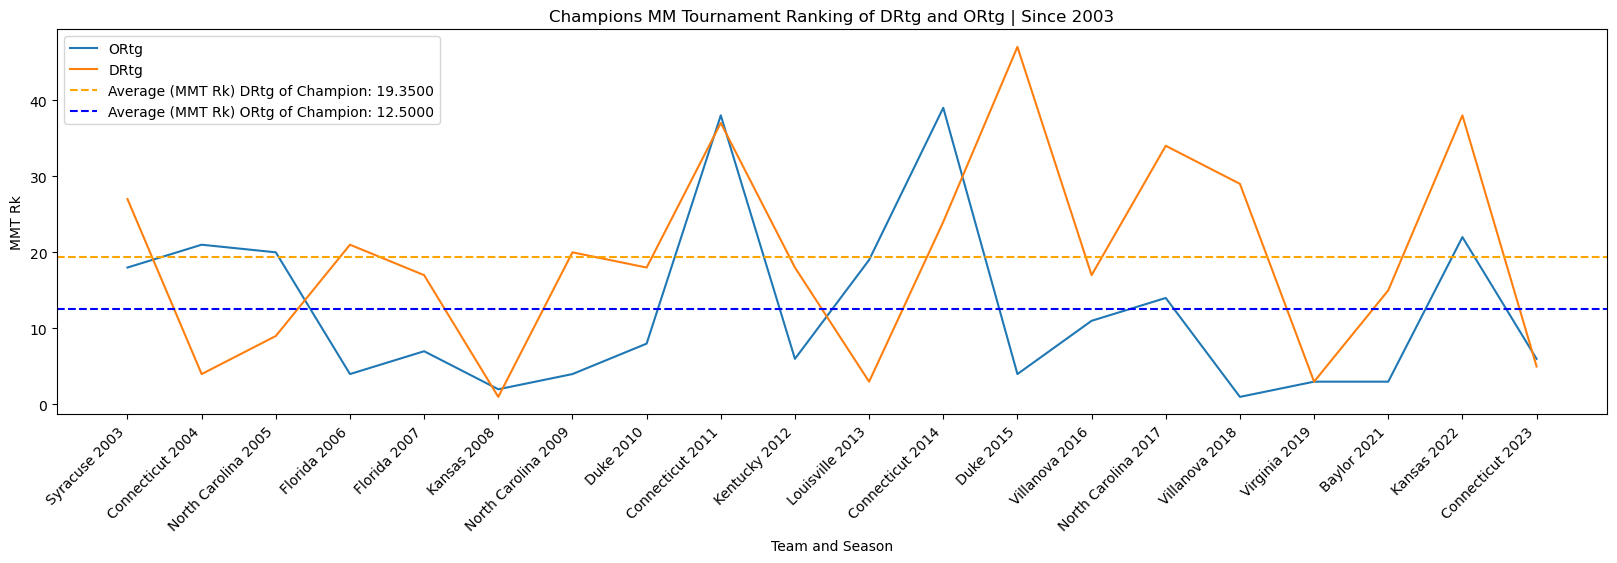

In [11]:
champion_sea = df.loc[df['champion share'] == 1].copy()  

champion_sea.sort_values(by='Season', inplace=True)

champion_sea['Season'] = champion_sea['Season'].astype(str)

plt.figure(figsize=(20, 5))
plt.title("Champions MM Tournament Ranking of DRtg and ORtg | Since 2003")
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['ORtg'], label="ORtg")
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['DRtg'], label="DRtg")

average_ORtg = champion_sea['ORtg'].mean()
average_DRtg = champion_sea['DRtg'].mean()

plt.axhline(y=average_DRtg, color='orange', linestyle='--', label=f'Average (MMT Rk) DRtg of Champion: {average_DRtg:.4f}')
plt.axhline(y=average_ORtg, color='blue', linestyle='--', label=f'Average (MMT Rk) ORtg of Champion: {average_ORtg:.4f}')

plt.xlabel('Team and Season')
plt.ylabel('MMT Rk')

plt.xticks(rotation=45, ha='right')
plt.legend()

plt.savefig("OvD_chp_lr", bbox_inches='tight', pad_inches=0.1)
image = Image.open("OvD_chp_lr.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("OvD_chp_lr.png")

plt.show()

In [12]:
print("Offense")

champions_df = df[df['champion'] == 1.00]
unique_ranks = champions_df['ORtg'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['ORtg'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions ORtg MMT Rk {rank}: {percentage:.2f}%")

print("============================================================================\n")    
print("Defense")
    
champions_df = df[df['champion'] == 1.00]
unique_ranks = champions_df['DRtg'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['DRtg'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions DRtg MMT Rk {rank}: {percentage:.2f}%")

Offense
The percentage of champions ORtg MMT Rk Rank 4.0: 15.00%
The percentage of champions ORtg MMT Rk Rank 6.0: 10.00%
The percentage of champions ORtg MMT Rk Rank 3.0: 10.00%
The percentage of champions ORtg MMT Rk Rank 22.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 1.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 14.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 11.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 39.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 19.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 38.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 8.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 2.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 7.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 20.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 21.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 18.0: 5.00%

Defense
The percentage of champions DRtg MMT Rk Rank 3.0: 10.00%
The percentage of 

In [42]:
print("Offense Top 5: ", 5+5+10+15)
print("Defense Top 6: ", 5+10+5+5)

Offense Top 5:  35
Defense Top 6:  25


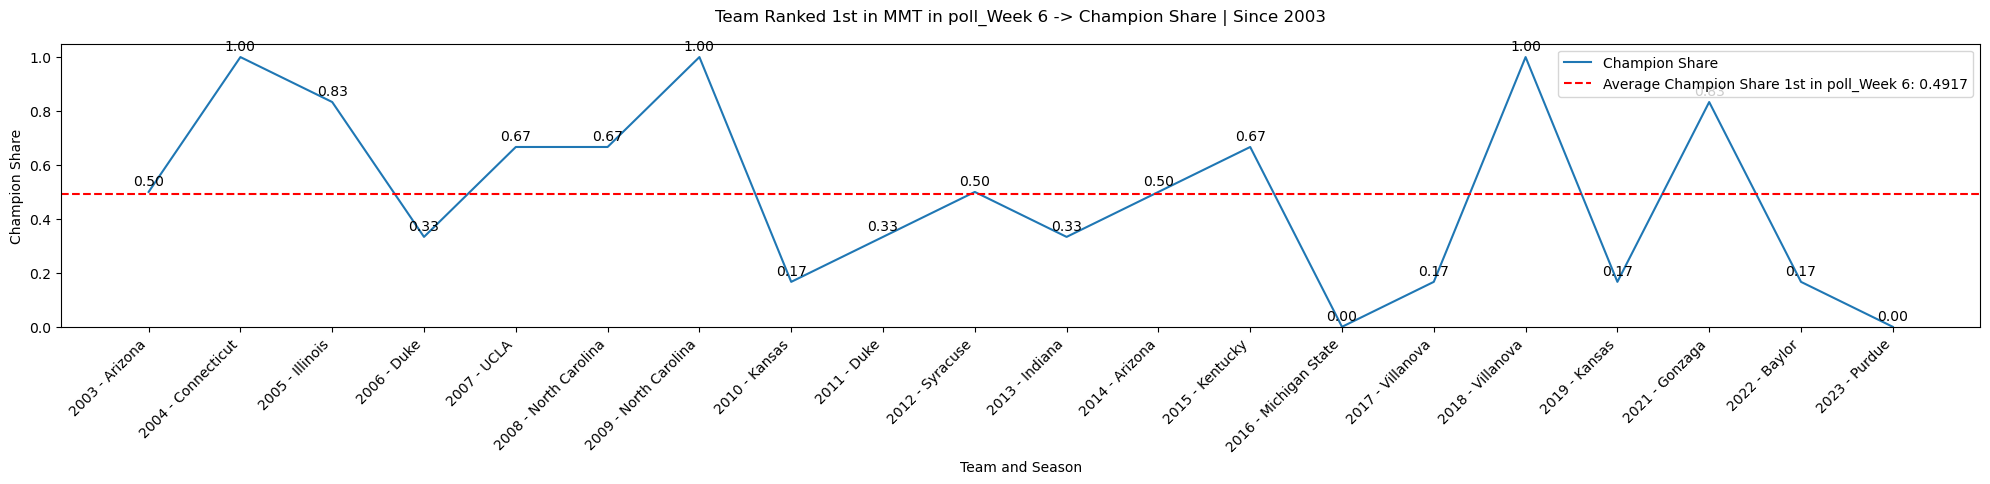

In [13]:
first_in_league_poll_week_6 = df.loc[df['poll_Week 6'] == 1].copy()

first_in_league_poll_week_6.sort_values(by='Season', inplace=True)


plt.figure(figsize=(20, 5))
plt.title("Team Ranked 1st in MMT in poll_Week 6 -> Champion Share | Since 2003", y=1.05)

first_in_league_poll_week_6.loc[:, 'Season'] = first_in_league_poll_week_6['Season'].astype(str)

sns.lineplot(x=first_in_league_poll_week_6['Season'] + " - " + first_in_league_poll_week_6['Team'],
             y=first_in_league_poll_week_6['champion share'],
             label="Champion Share", errorbar=None)

plt.xticks(rotation=45, ha="right")

for i, row in first_in_league_poll_week_6.iterrows():
    plt.annotate(f"{row['champion share']:.2f}", (row['Season'] + " - " + row['Team'], row['champion share']),
                 textcoords="offset points", xytext=(0, 5), ha='center')

average_champion_share = first_in_league_poll_week_6['champion share'].mean()
plt.axhline(y=average_champion_share, color='r', linestyle='--', label=f'Average Champion Share 1st in poll_Week 6: {average_champion_share:.4f}')

plt.xlabel("Team and Season")
plt.ylabel("Champion Share")
plt.ylim(bottom=0)
plt.legend()
plt.tight_layout()

plt.savefig("poll_wk6_chps", bbox_inches='tight', pad_inches=0.1)
image = Image.open("poll_wk6_chps.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("poll_wk6_chps.png")

plt.show()

In [14]:
champions_df = df[df['champion'] == 1.00]
unique_ranks = champions_df['poll_Week 6'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['poll_Week 6'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions poll_Week 6 MMT Rk {rank}: {percentage:.2f}%")

The percentage of champions poll_Week 6 MMT Rk Rank 3.0: 15.00%
The percentage of champions poll_Week 6 MMT Rk Rank 7.0: 15.00%
The percentage of champions poll_Week 6 MMT Rk Rank 6.0: 15.00%
The percentage of champions poll_Week 6 MMT Rk Rank 1.0: 15.00%
The percentage of champions poll_Week 6 MMT Rk Rank 2.0: 10.00%
The percentage of champions poll_Week 6 MMT Rk Rank 5.0: 10.00%
The percentage of champions poll_Week 6 MMT Rk Rank 11.0: 5.00%
The percentage of champions poll_Week 6 MMT Rk Rank 9.0: 5.00%
The percentage of champions poll_Week 6 MMT Rk Rank 4.0: 5.00%
The percentage of champions poll_Week 6 MMT Rk Rank 24.0: 5.00%


In [30]:
#Champions | Summary Stats 
champion = df.loc[df['champion share'] == 1.00]
champion_poll_Week6_stats = champion['poll_Week 6'].describe()

print("Summary Statistics for Champions' MMT Rk of poll_Week 6:")
print(champion_poll_Week6_stats)

Summary Statistics for Champions' MMT Rk of poll_Week 6:
count    20.000000
mean      5.650000
std       5.122448
min       1.000000
25%       2.750000
50%       5.000000
75%       7.000000
max      24.000000
Name: poll_Week 6, dtype: float64


### Analysis of Week 6 Top 25 AP Polls
- On average teams that rank 1st in the tournament in ap poll week 6 get about 3 tourney wins (2.9502 wins)
- 70% of the time (about 13/19 last champions) rank top 6 in week 6 ap polls (top 25)
- all champions ranked in top 11 on week 6 ap polls

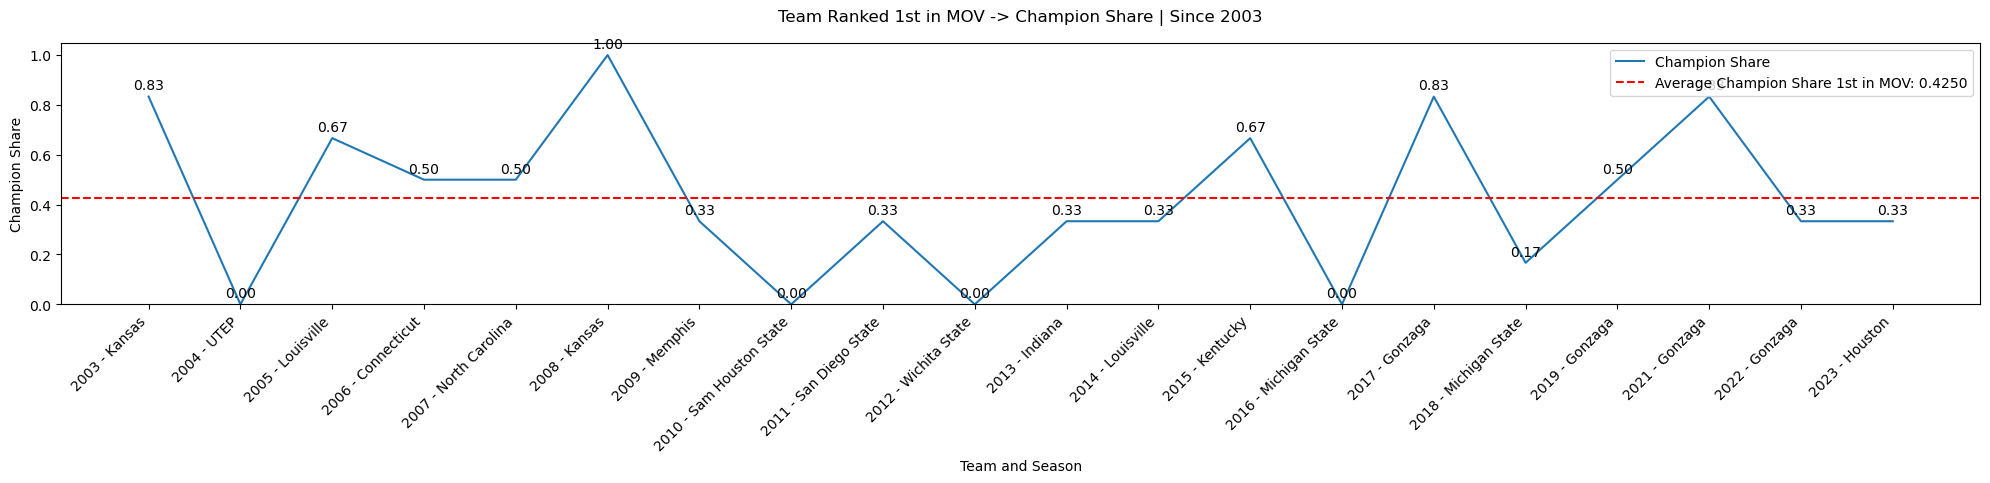

In [15]:
first_in_league_mov = df.loc[df['MOV'] == 1].copy()

first_in_league_mov.sort_values(by='Season', inplace=True)


plt.figure(figsize=(20, 5))
plt.title("Team Ranked 1st in MOV -> Champion Share | Since 2003", y=1.05)

first_in_league_mov.loc[:, 'Season'] = first_in_league_mov['Season'].astype(str)

sns.lineplot(x=first_in_league_mov['Season'] + " - " + first_in_league_mov['Team'],
             y=first_in_league_mov['champion share'],
             label="Champion Share", errorbar=None)

plt.xticks(rotation=45, ha="right")

for i, row in first_in_league_mov.iterrows():
    plt.annotate(f"{row['champion share']:.2f}", (row['Season'] + " - " + row['Team'], row['champion share']),
                 textcoords="offset points", xytext=(0, 5), ha='center')

average_champion_share = first_in_league_mov['champion share'].mean()
plt.axhline(y=average_champion_share, color='r', linestyle='--', label=f'Average Champion Share 1st in MOV: {average_champion_share:.4f}')

plt.xlabel("Team and Season")
plt.ylabel("Champion Share")
plt.ylim(bottom=0)
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
champions_df = df[df['champion'] == 1.00]
unique_ranks = champions_df['MOV'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['MOV'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions MOV {rank}: {percentage:.2f}%")

The percentage of champions MOV Rank 3.0: 30.00%
The percentage of champions MOV Rank 2.0: 10.00%
The percentage of champions MOV Rank 12.0: 10.00%
The percentage of champions MOV Rank 38.0: 10.00%
The percentage of champions MOV Rank 24.0: 5.00%
The percentage of champions MOV Rank 4.0: 5.00%
The percentage of champions MOV Rank 6.0: 5.00%
The percentage of champions MOV Rank 16.0: 5.00%
The percentage of champions MOV Rank 10.0: 5.00%
The percentage of champions MOV Rank 5.0: 5.00%
The percentage of champions MOV Rank 1.0: 5.00%
The percentage of champions MOV Rank 9.0: 5.00%


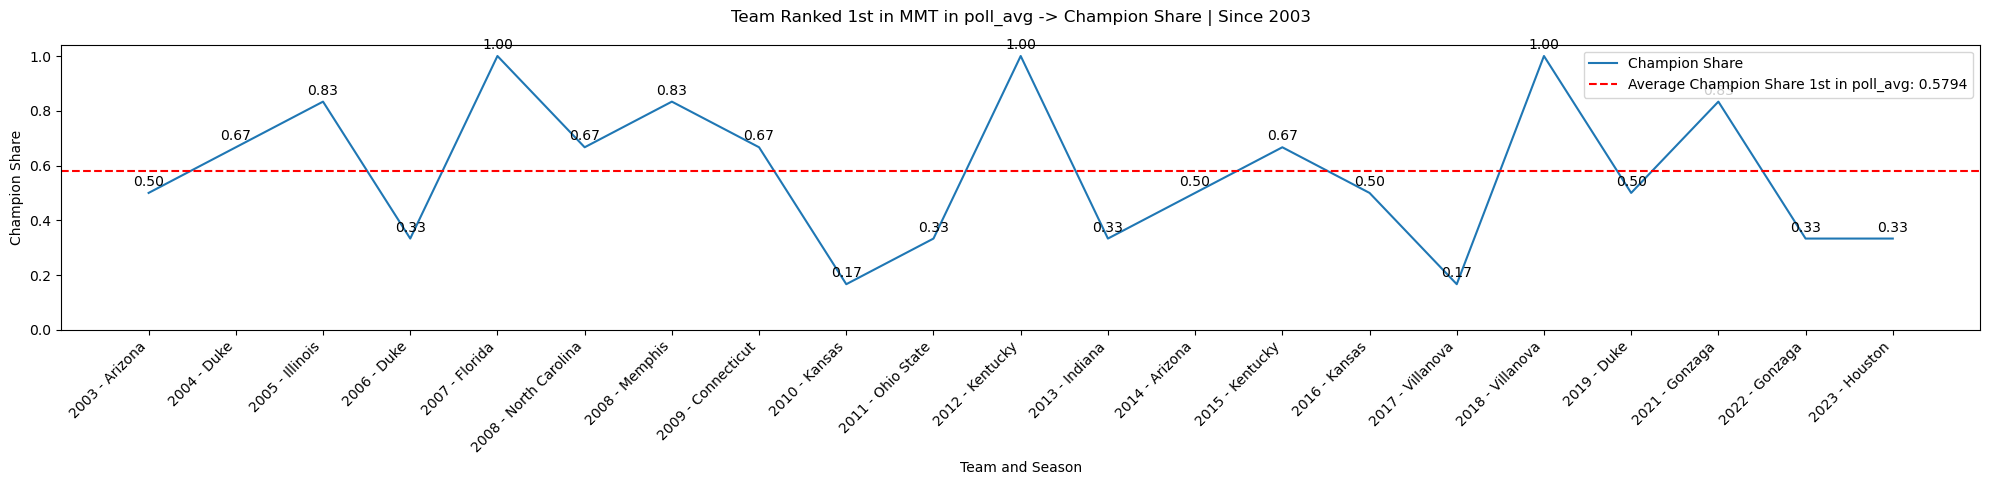

In [17]:
first_in_league_poll_avg = df.loc[df['poll_avg'] == 1].copy()

first_in_league_poll_avg.sort_values(by='Season', inplace=True)


plt.figure(figsize=(20, 5))
plt.title("Team Ranked 1st in MMT in poll_avg -> Champion Share | Since 2003", y=1.05)

first_in_league_poll_avg.loc[:, 'Season'] = first_in_league_poll_avg['Season'].astype(str)

sns.lineplot(x=first_in_league_poll_avg['Season'] + " - " + first_in_league_poll_avg['Team'],
             y=first_in_league_poll_avg['champion share'],
             label="Champion Share", errorbar=None)

plt.xticks(rotation=45, ha="right")

for i, row in first_in_league_poll_avg.iterrows():
    plt.annotate(f"{row['champion share']:.2f}", (row['Season'] + " - " + row['Team'], row['champion share']),
                 textcoords="offset points", xytext=(0, 5), ha='center')

average_champion_share = first_in_league_poll_avg['champion share'].mean()
plt.axhline(y=average_champion_share, color='r', linestyle='--', label=f'Average Champion Share 1st in poll_avg: {average_champion_share:.4f}')

plt.xlabel("Team and Season")
plt.ylabel("Champion Share")
plt.ylim(bottom=0)
plt.legend()
plt.tight_layout()

plt.savefig("rk_1st_poll_avg", bbox_inches='tight', pad_inches=0.1)
image = Image.open("rk_1st_poll_avg.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("rk_1st_poll_avg.png")

plt.show()

### Analysis of teams ranked 1st in overall poll average
- Teams ranked 1st in MMT in total poll average (reverse Order - pre 1 - 18) on average achieve 3.48 wins in the tourney
- Teams ranked 1st in MMT in total poll average (reverse Order - pre 1 - 18) at minimum get a win the tournament.
- 75% of the time the champion is top 6 in this feature
- 66% of the time team ranked 1st is this feature makes it to at least the elite 8.

In [18]:
champions_df = df[df['champion'] == 1.00]
unique_ranks = champions_df['poll_avg'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['poll_avg'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions poll_avg {rank}: {percentage:.2f}%")

The percentage of champions poll_avg Rank 2.0: 20.00%
The percentage of champions poll_avg Rank 1.0: 15.00%
The percentage of champions poll_avg Rank 5.0: 10.00%
The percentage of champions poll_avg Rank 3.0: 10.00%
The percentage of champions poll_avg Rank 6.0: 10.00%
The percentage of champions poll_avg Rank 4.0: 10.00%
The percentage of champions poll_avg Rank 8.0: 10.00%
The percentage of champions poll_avg Rank 12.0: 5.00%
The percentage of champions poll_avg Rank 18.0: 5.00%
The percentage of champions poll_avg Rank 25.0: 5.00%


In [93]:
1+1+1+1+1+1

6

In [96]:
14/21

0.6666666666666666

In [89]:
.5794*6

3.4764

In [19]:
df = pd.read_csv("NCAA Champion RawData.csv")
#df = pd.read_csv("NCAA Champion LR Data.csv")

In [20]:
df.drop(df[df['Season'] < 2004].index, inplace = True)

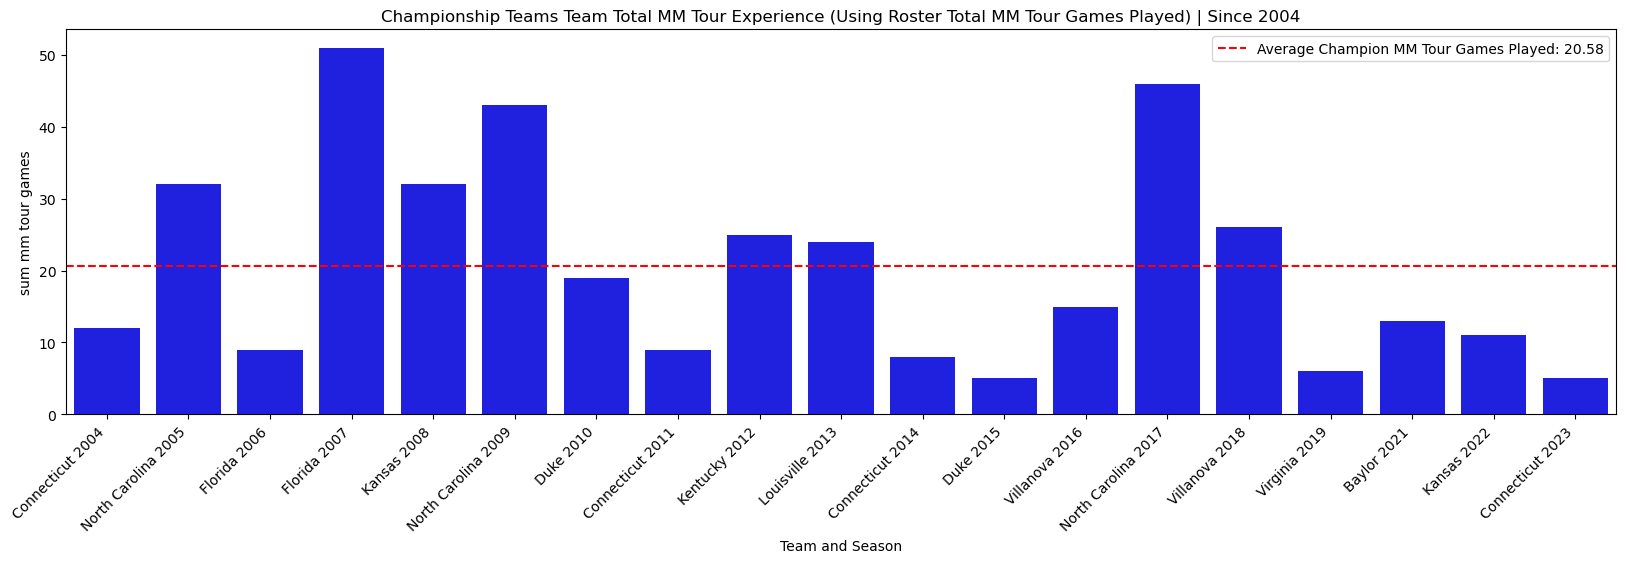

In [21]:
champion_sea = df.loc[df['champion share'] == 1].copy()  

champion_sea.sort_values(by='Season', inplace=True)

champion_sea['Season'] = champion_sea['Season'].astype(str)

champion_sea['team_season'] = champion_sea['Team'] + ' ' + champion_sea['Season']

plt.figure(figsize=(20, 5))
plt.title("Championship Teams Team Total MM Tour Experience (Using Roster Total MM Tour Games Played) | Since 2004")

sns.barplot(x=champion_sea['team_season'], y=champion_sea['sum mm tour games'], color='blue')

average_mvp = champion_sea['sum mm tour games'].mean()

plt.axhline(y=average_mvp, color='r', linestyle='--', label=f'Average Champion MM Tour Games Played: {average_mvp:.2f}')

plt.xlabel('Team and Season')
plt.ylabel('sum mm tour games')
plt.xticks(rotation=45, ha='right')
plt.legend().set_visible(True)

plt.savefig("MMT_exp_chps", bbox_inches='tight', pad_inches=0.1)
image = Image.open("MMT_exp_chps.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("MMT_exp_chps.png")

plt.show()

In [22]:
corr = data.corr().abs()
selected_features = corr.loc[corr['champion share']>.25].index
print(selected_features.tolist())

['sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L10Y cs', 'sum school L2Y cs', 'sum school L4Y cs', 'sum school L6Y cs', 'sum school L8Y cs', 'sum school L10Y cs', 'sum school E8 apps', 'FIC40', 'ORtg', 'eDiff', 'MOV', 'Ast/TO', "W's", "L's", 'Win %', 'Seed_Tournament', 'Seed_1', 'sum mm tour games', 'sum polls made', 'poll_Pre 1', 'poll_Week 2', 'poll_Week 3', 'poll_Week 4', 'poll_Week 5', 'poll_Week 6', 'poll_Week 7', 'poll_Week 8', 'poll_Week 9', 'poll_Week 10', 'poll_Week 11', 'poll_Week 12', 'poll_Week 13', 'poll_Week 14', 'poll_Week 15', 'poll_Week 16', 'poll_Week 17', 'poll_Week 18', 'poll_avg', 'top_12_Week 12', 'team_rating_avg_custom', 'max_player_rating_custom', 'cf_rating_custom', 'champion share']


In [23]:
#df = pd.read_csv("NCAA Champion RawData.csv")
df = pd.read_csv("NCAA Champion LR Data.csv")

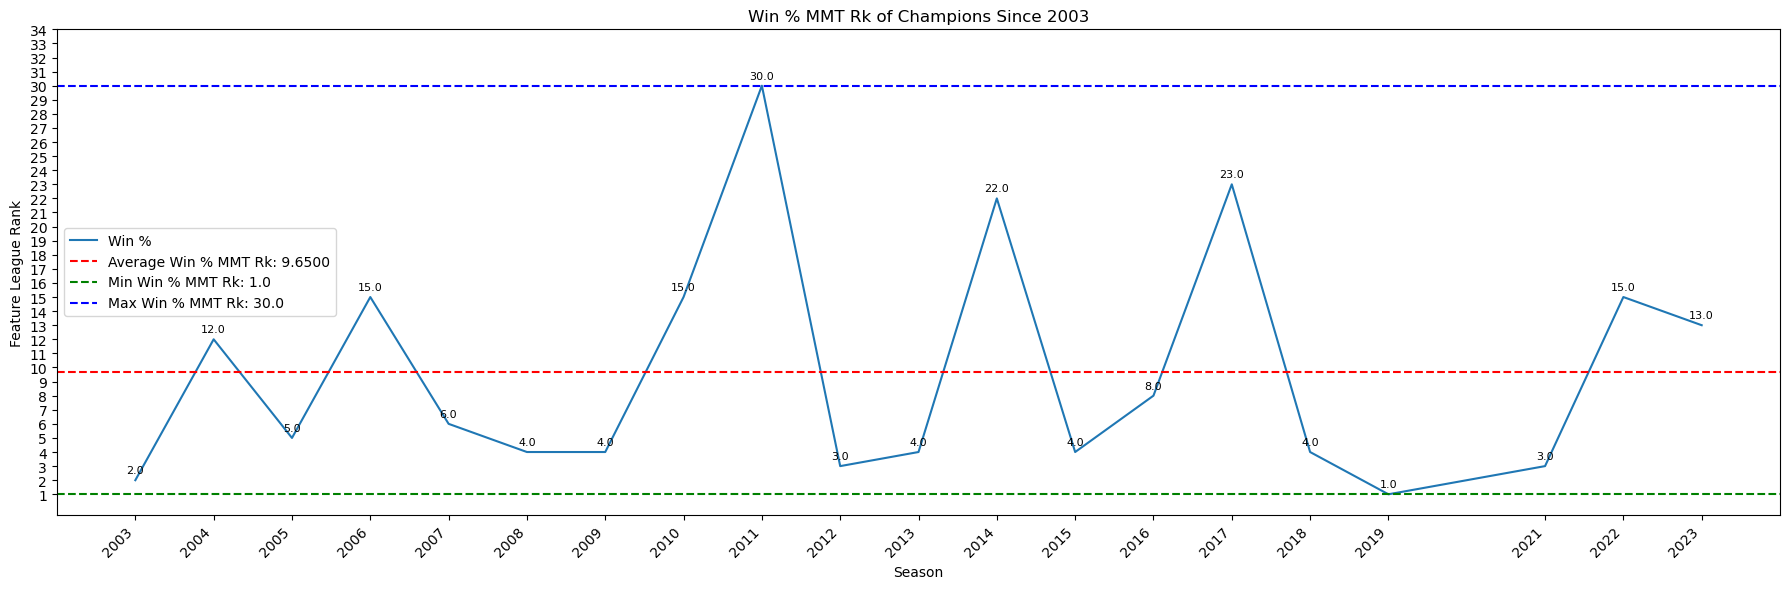

In [24]:
champion = df.loc[df['champion share'] == 1.00]

plt.figure(figsize=(18, 6))

sns.lineplot(x=champion['Season'], y=champion['Win %'], label="Win %", err_style="band")

plt.xticks(champion['Season'].unique(), rotation=45, ha="right")

plt.yticks(range(1, 35))

average_champion_wins_ranking = champion['Win %'].mean()
min_champion_wins_ranking = champion['Win %'].min()
max_champion_wins_ranking = champion['Win %'].max()

plt.axhline(y=average_champion_wins_ranking, color='r', linestyle='--', label=f'Average Win % MMT Rk: {average_champion_wins_ranking:.4f}')
plt.axhline(y=min_champion_wins_ranking, color='g', linestyle='--', label=f'Min Win % MMT Rk: {min_champion_wins_ranking}')
plt.axhline(y=max_champion_wins_ranking, color='b', linestyle='--', label=f'Max Win % MMT Rk: {max_champion_wins_ranking}')

for season, rank in zip(champion['Season'], champion['Win %']):
    plt.annotate(f'{rank}', (season, rank), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='black')

plt.title("Win % MMT Rk of Champions Since 2003")
plt.xlabel("Season")
plt.ylabel("Feature League Rank")
plt.legend()
plt.tight_layout()

#plt.savefig("line_chart_wins.png", bbox_inches='tight', pad_inches=0.1)
#image = Image.open("line_chart_wins.png")
#image_with_border = ImageOps.expand(image, border=2, fill='black')
#image_with_border.save("line_chart_wins.png")

plt.show()

In [25]:
champions_df = df[df['champion'] == 1.00]
unique_ranks = champions_df['Win %'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['Win %'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions Win % MMT Rk {rank}: {percentage:.2f}%")

The percentage of champions Win % MMT Rk Rank 4.0: 25.00%
The percentage of champions Win % MMT Rk Rank 15.0: 15.00%
The percentage of champions Win % MMT Rk Rank 3.0: 10.00%
The percentage of champions Win % MMT Rk Rank 13.0: 5.00%
The percentage of champions Win % MMT Rk Rank 1.0: 5.00%
The percentage of champions Win % MMT Rk Rank 23.0: 5.00%
The percentage of champions Win % MMT Rk Rank 8.0: 5.00%
The percentage of champions Win % MMT Rk Rank 22.0: 5.00%
The percentage of champions Win % MMT Rk Rank 30.0: 5.00%
The percentage of champions Win % MMT Rk Rank 6.0: 5.00%
The percentage of champions Win % MMT Rk Rank 5.0: 5.00%
The percentage of champions Win % MMT Rk Rank 12.0: 5.00%
The percentage of champions Win % MMT Rk Rank 2.0: 5.00%


In [26]:
df = pd.read_csv("NCAA Champion LR Data.csv")
print(list(df.columns))

['Season', '#', 'Team/Season', 'Team', 'Conference', 'Conference/Season', 'Bracket Region', 'Bracket Region/Season', 'sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L10Y cs', 'sum school L1Y cs', 'sum school L2Y cs', 'sum school L4Y cs', 'sum school L6Y cs', 'sum school L8Y cs', 'sum school L10Y cs', 'sum school champion', 'sum school E8 apps', 'sum school F4 apps', 'sum school Finals apps', 'TS%', 'eFG%', 'Total S%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'PPS', 'FIC40', 'ORtg', 'DRtg', 'eDiff', 'Poss', 'Pace', 'Dbl Dbl', 'Tpl Dbl', '40 Pts', '20 Reb', '20 Ast', '5 Stl', '5 Blk', 'High Game', 'MOV', 'Techs', 'HOB', 'Ast/TO', 'Stl/TO', 'FT/FGA', "W's", "L's", 'Win %', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG', 'TOV', 'PF', 'Seed_Tournament', 'Seed_1', 'Seed_2', 'Seed_3', 'Seed_4', 'make tournament', 'sum mm tour games', 'sum cf tour games', 'sum cf re

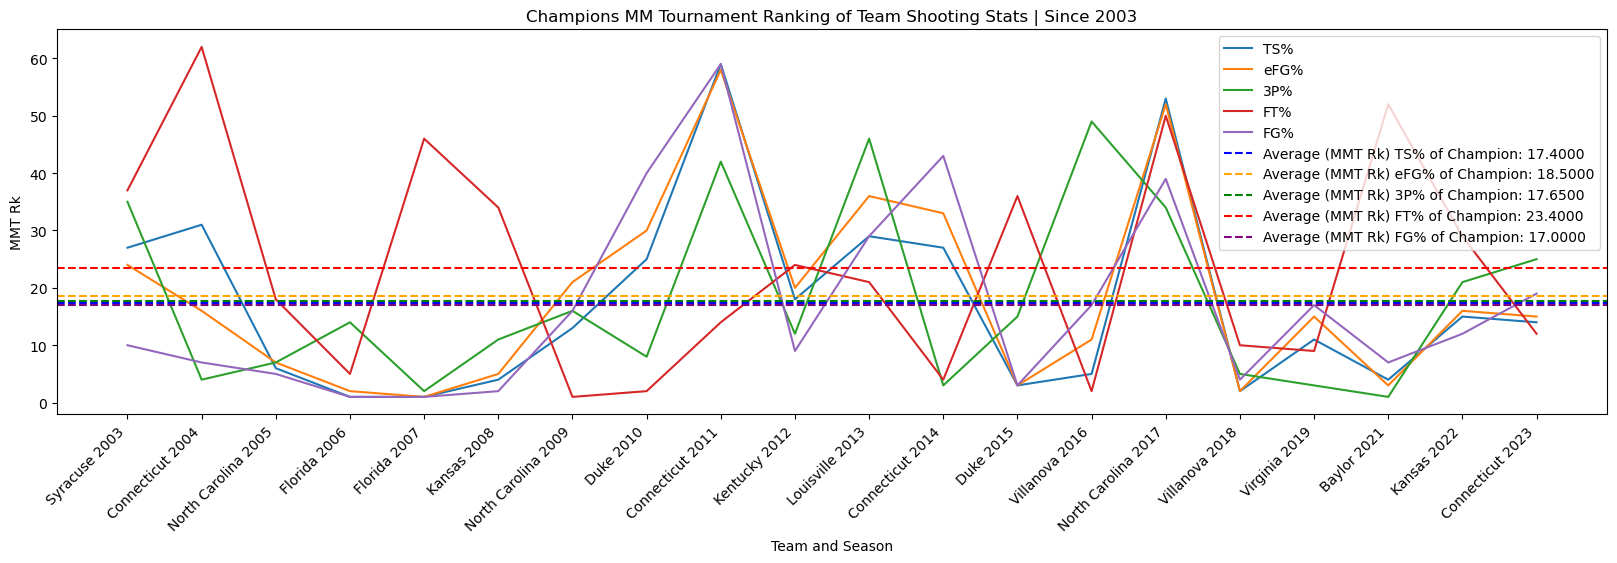

In [27]:
#df = pd.read_csv("NCAA Champion RawData.csv")
df = pd.read_csv("NCAA Champion LR Data.csv")

champion_sea = df.loc[df['champion share'] == 1].copy()  

champion_sea.sort_values(by='Season', inplace=True)

champion_sea['Season'] = champion_sea['Season'].astype(str)

plt.figure(figsize=(20, 5))
plt.title("Champions MM Tournament Ranking of Team Shooting Stats | Since 2003")
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['TS%'], label='TS%')
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['eFG%'], label='eFG%')
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['3P%'], label='3P%')
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['FT%'], label='FT%')
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['FG%'], label='FG%')

average_ts = champion_sea['TS%'].mean()
average_efg = champion_sea['eFG%'].mean()
average_three = champion_sea['3P%'].mean()
average_free = champion_sea['FT%'].mean()
average_field = champion_sea['FG%'].mean()

plt.axhline(y=average_ts, color='blue', linestyle='--', label=f'Average (MMT Rk) TS% of Champion: {average_ts:.4f}')
plt.axhline(y=average_efg, color='orange', linestyle='--', label=f'Average (MMT Rk) eFG% of Champion: {average_efg:.4f}')
plt.axhline(y=average_three, color='green', linestyle='--', label=f'Average (MMT Rk) 3P% of Champion: {average_three:.4f}')
plt.axhline(y=average_free, color='red', linestyle='--', label=f'Average (MMT Rk) FT% of Champion: {average_free:.4f}')
plt.axhline(y=average_field, color='purple', linestyle='--', label=f'Average (MMT Rk) FG% of Champion: {average_field:.4f}')

plt.xlabel('Team and Season')
plt.ylabel('MMT Rk')

plt.xticks(rotation=45, ha='right')
plt.legend()

plt.savefig("MMT_chps_sht_stats", bbox_inches='tight', pad_inches=0.1)
image = Image.open("MMT_chps_sht_stats.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("MMT_chps_sht_stats.png")

plt.show()

### Shooting Stats Analysis:
- Championship teams need to be in the upper quartile in terms of team shooting stats. 
- Every tournament takes in 64 teams, so average all TM rankings of teams shooting stats they need to in the 1st quartile, 18.79 and below.
- True shooting is the best shooting team measurment.

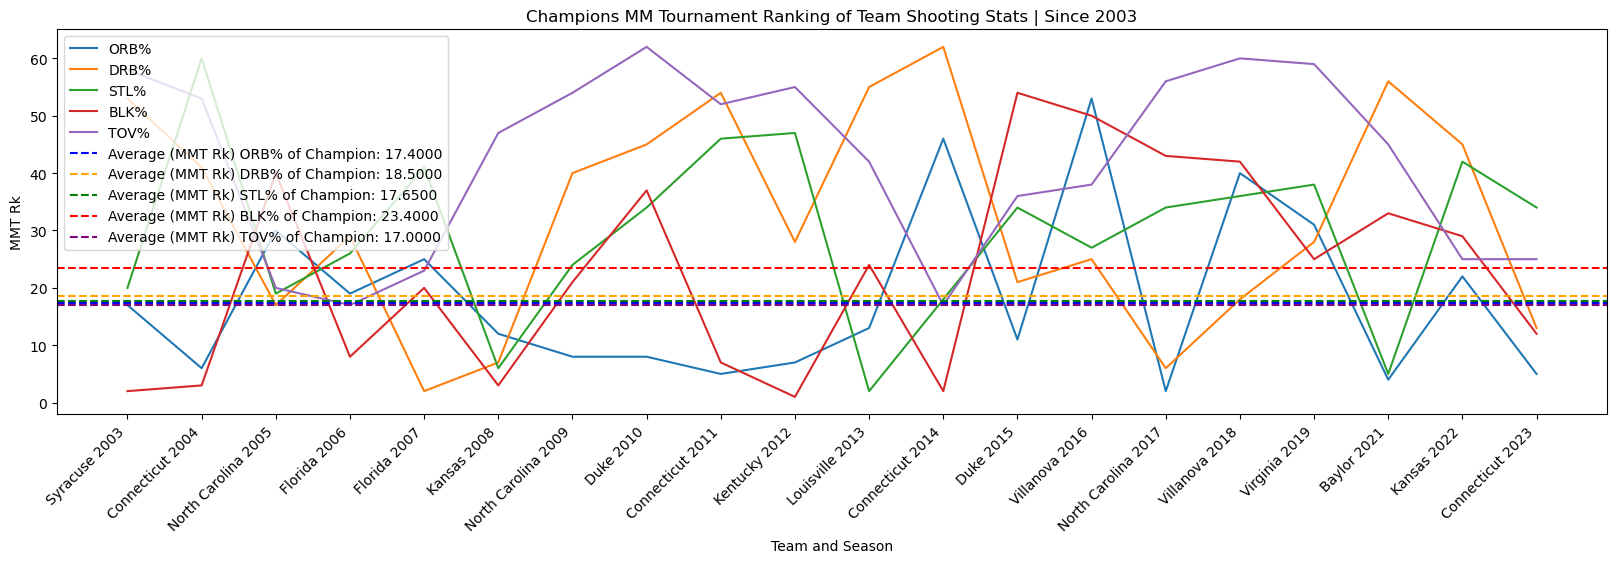

In [28]:
#df = pd.read_csv("NCAA Champion RawData.csv")
df = pd.read_csv("NCAA Champion LR Data.csv")

champion_sea = df.loc[df['champion share'] == 1].copy()  

champion_sea.sort_values(by='Season', inplace=True)

champion_sea['Season'] = champion_sea['Season'].astype(str)

plt.figure(figsize=(20, 5))
plt.title("Champions MM Tournament Ranking of Team Shooting Stats | Since 2003")
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['ORB%'], label='ORB%')
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['DRB%'], label='DRB%')
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['STL%'], label='STL%')
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['BLK%'], label='BLK%')
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['TOV%'], label='TOV%')

average_orb = champion_sea['ORB%'].mean()
average_drb = champion_sea['DRB%'].mean()
average_stl = champion_sea['STL%'].mean()
average_blk = champion_sea['BLK%'].mean()
average_tov = champion_sea['TOV%'].mean()

plt.axhline(y=average_ts, color='blue', linestyle='--', label=f'Average (MMT Rk) ORB% of Champion: {average_ts:.4f}')
plt.axhline(y=average_efg, color='orange', linestyle='--', label=f'Average (MMT Rk) DRB% of Champion: {average_efg:.4f}')
plt.axhline(y=average_three, color='green', linestyle='--', label=f'Average (MMT Rk) STL% of Champion: {average_three:.4f}')
plt.axhline(y=average_free, color='red', linestyle='--', label=f'Average (MMT Rk) BLK% of Champion: {average_free:.4f}')
plt.axhline(y=average_field, color='purple', linestyle='--', label=f'Average (MMT Rk) TOV% of Champion: {average_field:.4f}')

plt.xlabel('Team and Season')
plt.ylabel('MMT Rk')

plt.xticks(rotation=45, ha='right')
plt.legend() 
plt.show()

### Defense Stats Analysis:
- Championship teams need to be in the upper quartile in terms of team overall defensive stats. 
- Every tournament takes in 64 teams, so average all TM rankings of teams shooting stats they need to in the 1st quartile, 18.79 and below.
- Offensive rebounds are more important then defensive rebounds in terms mmt wins.

In [29]:
df = pd.read_csv("NCAA Champion LR Data.csv")
print(list(df.columns))

['Season', '#', 'Team/Season', 'Team', 'Conference', 'Conference/Season', 'Bracket Region', 'Bracket Region/Season', 'sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L10Y cs', 'sum school L1Y cs', 'sum school L2Y cs', 'sum school L4Y cs', 'sum school L6Y cs', 'sum school L8Y cs', 'sum school L10Y cs', 'sum school champion', 'sum school E8 apps', 'sum school F4 apps', 'sum school Finals apps', 'TS%', 'eFG%', 'Total S%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'PPS', 'FIC40', 'ORtg', 'DRtg', 'eDiff', 'Poss', 'Pace', 'Dbl Dbl', 'Tpl Dbl', '40 Pts', '20 Reb', '20 Ast', '5 Stl', '5 Blk', 'High Game', 'MOV', 'Techs', 'HOB', 'Ast/TO', 'Stl/TO', 'FT/FGA', "W's", "L's", 'Win %', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG', 'TOV', 'PF', 'Seed_Tournament', 'Seed_1', 'Seed_2', 'Seed_3', 'Seed_4', 'make tournament', 'sum mm tour games', 'sum cf tour games', 'sum cf re

Column Averages:
cf_rating_custom        11.25
region_rating_custom    19.30
dtype: float64


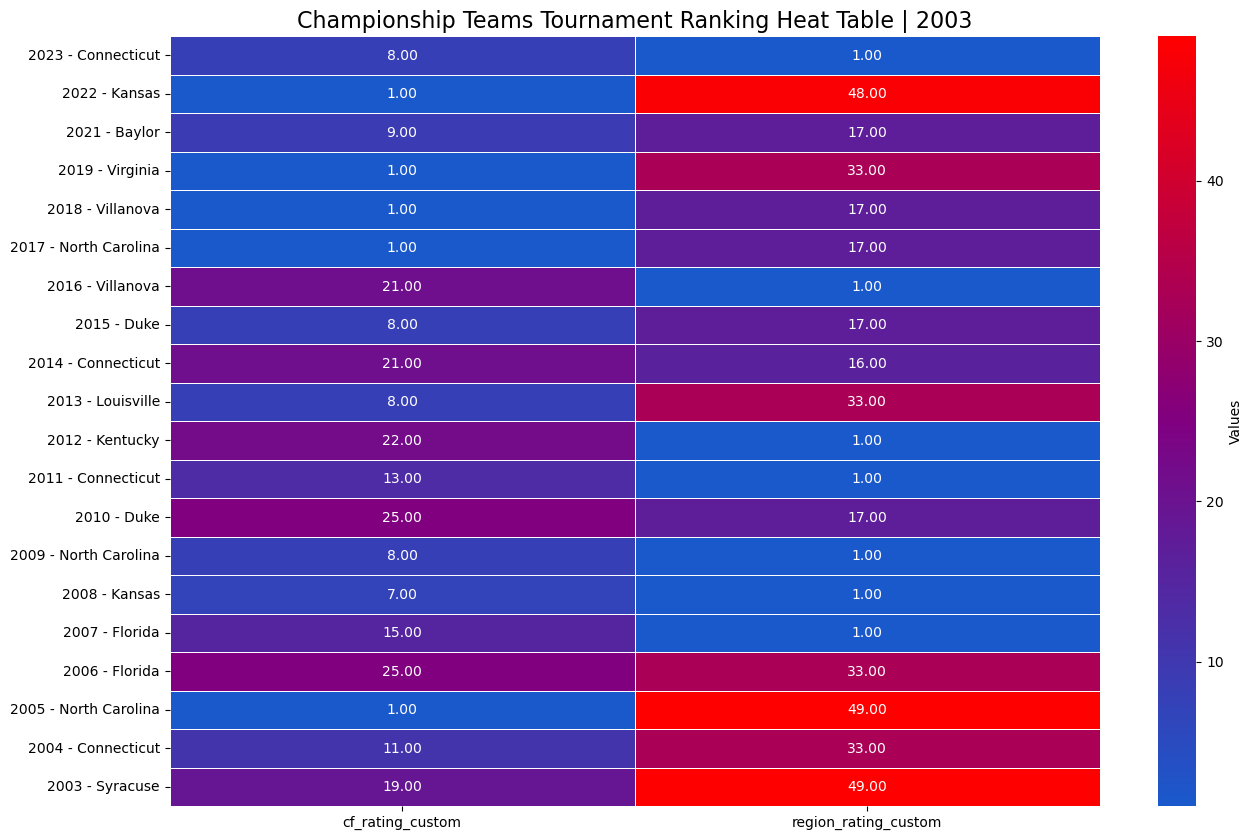

In [82]:
from matplotlib.colors import ListedColormap

champions_only = df[df['champion share'] == 1]

custom_palette = sns.color_palette("pastel", as_cmap=True)

large_color = 'red'  
middle_color = 'purple'
small_color = (0.1, 0.35, .8)

large_threshold = 1.5  
middle_threshold = 0.5 

colors = sns.color_palette([small_color, middle_color, large_color], as_cmap=True)
custom_cmap = sns.blend_palette(colors, as_cmap=True)

plt.figure(figsize=(15, 10))
heatmap_data = champions_only[['cf_rating_custom', 'region_rating_custom']]

heatmap = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap=custom_cmap, linewidths=.5, cbar_kws={'label': 'Values'}, vmin=heatmap_data.min().min(), vmax=heatmap_data.max().max())

championship_teams_labels = ['{} - {}'.format(season, team) for season, team in zip(champions_only['Season'], champions_only['Team'])]
plt.yticks(ticks=[i + 0.5 for i in range(len(championship_teams_labels))], labels=championship_teams_labels, rotation=0)

column_averages = heatmap_data.mean()
print("Column Averages:")
print(column_averages)

plt.title('Championship Teams Tournament Ranking Heat Table | 2003', fontsize=16)
plt.savefig("ht_allChamps_2_fea.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("ht_allChamps_2_fea.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("ht_allChamps_2_fea.png")

plt.show()

In [34]:
print("region_rating\n")

champions_df = df[df['champion'] == 1.00]
unique_ranks = champions_df['region_rating_custom'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['region_rating_custom'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions region {rank}: {percentage:.2f}%")
    
print("cf_rating\n")

champions_df = df[df['champion'] == 1.00]
unique_ranks = champions_df['cf_rating_custom'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['cf_rating_custom'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions cf {rank}: {percentage:.2f}%")

region_rating

The percentage of champions region Rank 1.0: 35.00%
The percentage of champions region Rank 17.0: 25.00%
The percentage of champions region Rank 33.0: 20.00%
The percentage of champions region Rank 49.0: 10.00%
The percentage of champions region Rank 48.0: 5.00%
The percentage of champions region Rank 16.0: 5.00%
cf_rating

The percentage of champions cf Rank 1.0: 25.00%
The percentage of champions cf Rank 8.0: 20.00%
The percentage of champions cf Rank 21.0: 10.00%
The percentage of champions cf Rank 25.0: 10.00%
The percentage of champions cf Rank 9.0: 5.00%
The percentage of champions cf Rank 22.0: 5.00%
The percentage of champions cf Rank 13.0: 5.00%
The percentage of champions cf Rank 7.0: 5.00%
The percentage of champions cf Rank 15.0: 5.00%
The percentage of champions cf Rank 11.0: 5.00%
The percentage of champions cf Rank 19.0: 5.00%


In [ ]:
1: 35%
2: 30%
3: 20%
4: 15%



In [35]:
print("bracket region strength rating")

champions_df = df[df['champion'] == 1.00]
unique_ranks = champions_df['region_rating_custom'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['region_rating_custom'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions region_rating_custom MMT Rk {rank}: {percentage:.2f}%")

print("============================================================================\n")    
print("school conference strength rating")
    
champions_df = df[df['champion'] == 1.00]
unique_ranks = champions_df['cf_rating_custom'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['cf_rating_custom'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions cf_rating_custom MMT Rk {rank}: {percentage:.2f}%")

bracket region strength rating
The percentage of champions region_rating_custom MMT Rk Rank 1.0: 35.00%
The percentage of champions region_rating_custom MMT Rk Rank 17.0: 25.00%
The percentage of champions region_rating_custom MMT Rk Rank 33.0: 20.00%
The percentage of champions region_rating_custom MMT Rk Rank 49.0: 10.00%
The percentage of champions region_rating_custom MMT Rk Rank 48.0: 5.00%
The percentage of champions region_rating_custom MMT Rk Rank 16.0: 5.00%

school conference strength rating
The percentage of champions cf_rating_custom MMT Rk Rank 1.0: 25.00%
The percentage of champions cf_rating_custom MMT Rk Rank 8.0: 20.00%
The percentage of champions cf_rating_custom MMT Rk Rank 21.0: 10.00%
The percentage of champions cf_rating_custom MMT Rk Rank 25.0: 10.00%
The percentage of champions cf_rating_custom MMT Rk Rank 9.0: 5.00%
The percentage of champions cf_rating_custom MMT Rk Rank 22.0: 5.00%
The percentage of champions cf_rating_custom MMT Rk Rank 13.0: 5.00%
The perce

### Analyzing strength of conference and bracket region related to championship success
- Oddly enough teams that ranked 1st in either or both school conference strength rating or bracket region strength win most of the championships
- So typically the teams that have harder paths in the bracket and tougher conference usually do better in the tournament the other teams.

In [74]:
1 16 32 64

16.0

In [75]:
(17.4+18.5+17.65+23.4+17)/5

18.79

win 64 (1 win) -> win 32 (2 wins) -> win 16 (3 wins) -> win 8 (4 wins) -> win 4 (5 wins) -> win 2 (6 wins)

In [49]:
corr = data.corr().abs()
selected_features = corr.loc[corr['champion share']>.25].index
print(selected_features.tolist())

['sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L8Y cs.1', 'sum school L2Y cs', 'sum school L4Y cs', 'sum school L6Y cs', 'sum school L8Y cs', 'sum school L10Y cs', 'sum school E8 apps', 'FIC40', 'ORtg', 'eDiff', 'MOV', 'Ast/TO', "W's", "L's", 'Win %', 'Seed_Tournament', 'Seed_1', 'sum mm tour games', 'sum polls made', 'poll_Pre 1', 'poll_Week 2', 'poll_Week 3', 'poll_Week 4', 'poll_Week 5', 'poll_Week 6', 'poll_Week 7', 'poll_Week 8', 'poll_Week 9', 'poll_Week 10', 'poll_Week 11', 'poll_Week 12', 'poll_Week 13', 'poll_Week 14', 'poll_Week 15', 'poll_Week 16', 'poll_Week 17', 'poll_Week 18', 'poll_avg', 'top_12_Week 12', 'team_rating_avg_custom', 'max_player_rating_custom', 'cf_rating_custom', 'champion share', 'champion']


Column Averages:
Seed_Tournament            1.85
team_rating_avg_custom     5.50
poll_Week 16               7.05
sum polls made             4.20
MOV                        9.85
poll_Pre 1                 8.25
sum conf L3Y cs           13.35
sum school L4Y cs         10.90
FTM                       25.45
5 Blk                     19.75
ORtg                      12.50
RPG                       19.75
sum conf L8Y cs           14.50
FT%                       23.40
DRB                       22.40
poll_Week 4                6.30
AST%                      27.25
Stl/TO                    19.50
Dbl Dbl                   20.05
STL%                      29.65
dtype: float64


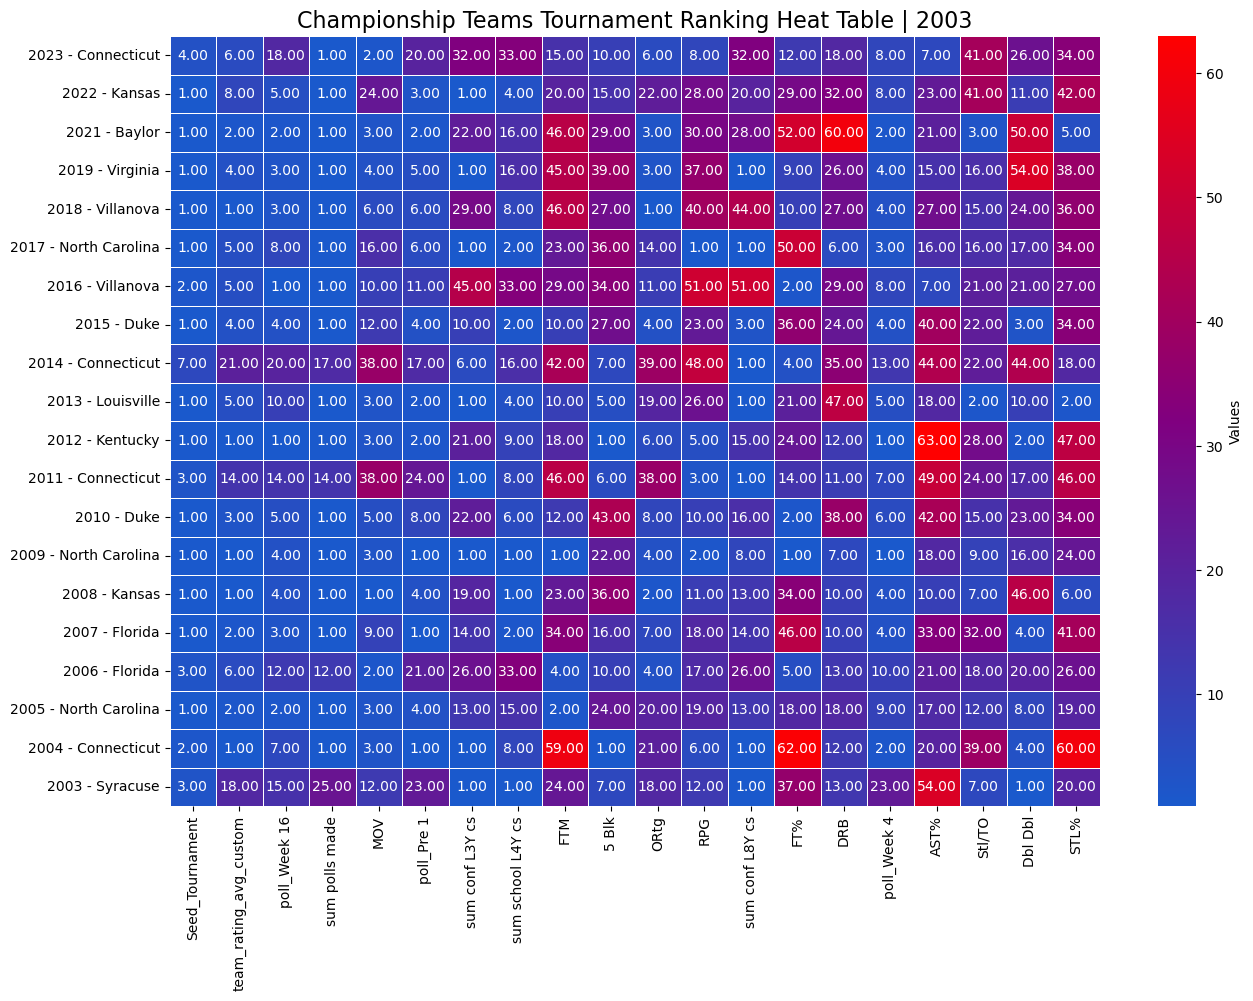

In [81]:
from matplotlib.colors import ListedColormap

champions_only = df[df['champion share'] == 1]

custom_palette = sns.color_palette("pastel", as_cmap=True)

large_color = 'red'  
middle_color = 'purple'
small_color = (0.1, 0.35, .8)

large_threshold = 1.5  
middle_threshold = 0.5 

colors = sns.color_palette([small_color, middle_color, large_color], as_cmap=True)
custom_cmap = sns.blend_palette(colors, as_cmap=True)

plt.figure(figsize=(15, 10))
heatmap_data = champions_only[['Seed_Tournament', 'team_rating_avg_custom', 'poll_Week 16', 'sum polls made', 'MOV', 'poll_Pre 1', 'sum conf L3Y cs', 'sum school L4Y cs', 'FTM', '5 Blk', 'ORtg', 'RPG', 'sum conf L8Y cs', 'FT%', 'DRB', 'poll_Week 4', 'AST%', 'Stl/TO', 'Dbl Dbl', 'STL%']]

heatmap = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap=custom_cmap, linewidths=.5, cbar_kws={'label': 'Values'}, vmin=heatmap_data.min().min(), vmax=heatmap_data.max().max())

championship_teams_labels = ['{} - {}'.format(season, team) for season, team in zip(champions_only['Season'], champions_only['Team'])]
plt.yticks(ticks=[i + 0.5 for i in range(len(championship_teams_labels))], labels=championship_teams_labels, rotation=0)

column_averages = heatmap_data.mean()
print("Column Averages:")
print(column_averages)

plt.title('Championship Teams Tournament Ranking Heat Table | 2003', fontsize=16)
plt.savefig("ht_allChamps_fea_table.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("ht_allChamps_fea_table.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("ht_allChamps_fea_table.png")

plt.show()

In [74]:
df = pd.read_csv("NCAA Champion LR Data.csv")
print(list(df.columns))

['Season', '#', 'Team/Season', 'Team', 'Conference', 'Conference/Season', 'Bracket Region', 'Bracket Region/Season', 'sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L10Y cs', 'sum school L1Y cs', 'sum school L2Y cs', 'sum school L4Y cs', 'sum school L6Y cs', 'sum school L8Y cs', 'sum school L10Y cs', 'sum school champion', 'sum school E8 apps', 'sum school F4 apps', 'sum school Finals apps', 'TS%', 'eFG%', 'Total S%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'PPS', 'FIC40', 'ORtg', 'DRtg', 'eDiff', 'Poss', 'Pace', 'Dbl Dbl', 'Tpl Dbl', '40 Pts', '20 Reb', '20 Ast', '5 Stl', '5 Blk', 'High Game', 'MOV', 'Techs', 'HOB', 'Ast/TO', 'Stl/TO', 'FT/FGA', "W's", "L's", 'Win %', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG', 'TOV', 'PF', 'Seed_Tournament', 'Seed_1', 'Seed_2', 'Seed_3', 'Seed_4', 'make tournament', 'sum mm tour games', 'sum cf tour games', 'sum cf re

Column Averages:
sum conf L1Y cs              9.000000
sum conf L3Y cs              2.666667
sum conf L5Y cs              1.000000
sum conf L8Y cs              1.000000
sum conf L10Y cs             1.000000
sum school L1Y cs           16.333333
sum school L2Y cs           15.666667
sum school L4Y cs            8.333333
sum school L6Y cs           10.333333
sum school L8Y cs            7.000000
sum school L10Y cs           5.000000
sum school champion          1.666667
sum school E8 apps           4.333333
sum school F4 apps           2.333333
sum school Finals apps       2.333333
sum mm tour games           25.333333
sum cf tour games           33.000000
sum cf reg games            28.000000
sum career games            29.666667
max_player_rating_custom    14.000000
cf_rating_custom            17.666667
region_rating_custom        22.000000
ORtg                        31.666667
DRtg                        29.333333
BPG                          2.000000
SPG                         23.33

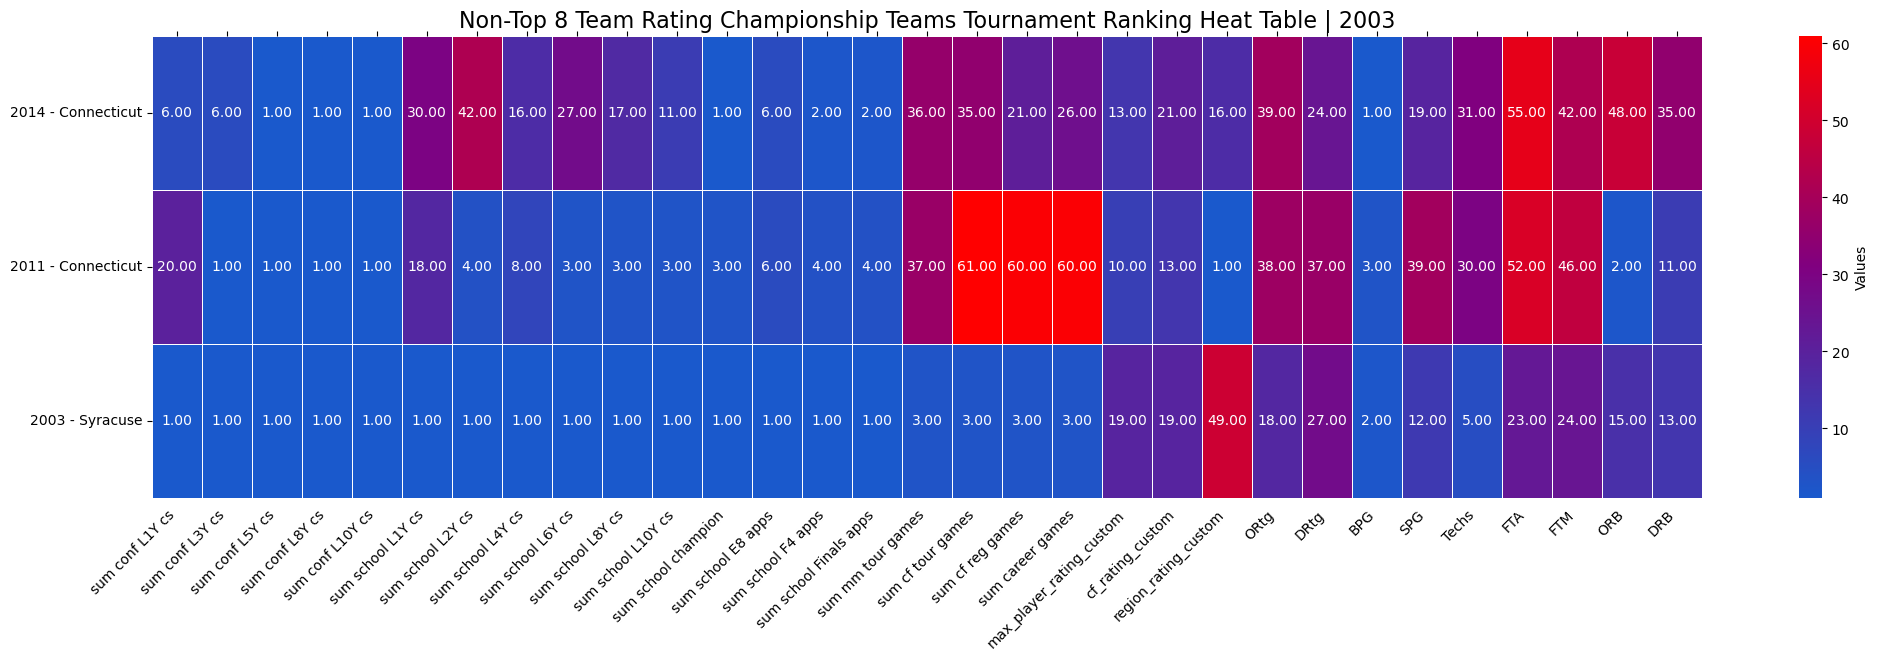

In [80]:
df = pd.read_csv("NCAA Champion LR Data.csv")
#df = pd.read_csv("NCAA Champion RawData.csv")

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageOps

teams_of_interest = ['Syracuse 2003', 'Connecticut 2011', 'Connecticut 2014']
champions_only = df[df['Team/Season'].isin(teams_of_interest)].copy()  

numeric_columns = ['sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L10Y cs',
                   'sum school L1Y cs', 'sum school L2Y cs', 'sum school L4Y cs', 'sum school L6Y cs', 'sum school L8Y cs', 
                   'sum school L10Y cs', 'sum school champion', 'sum school E8 apps', 'sum school F4 apps', 'sum school Finals apps',
                  'sum mm tour games', 'sum cf tour games', 'sum cf reg games', 'sum career games', 'max_player_rating_custom', 'cf_rating_custom', 
                   'region_rating_custom', 'ORtg', 'DRtg', 'BPG', 'SPG', 'Techs', 'FTA' ,'FTM', 'ORB','DRB']


custom_palette = sns.color_palette("pastel", as_cmap=True)

large_color = 'red'
middle_color = 'purple'
small_color = (0.1, 0.35, 0.8)

large_threshold = 1.5
middle_threshold = 0.5

colors = sns.color_palette([small_color, middle_color, large_color], as_cmap=True)
custom_cmap = sns.blend_palette(colors, as_cmap=True)

plt.figure(figsize=(25, 6))
heatmap = sns.heatmap(
    champions_only[numeric_columns],
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    linewidths=.5,
    cbar_kws={'label': 'Values'},
    vmin=champions_only[numeric_columns].min().min(),
    vmax=champions_only[numeric_columns].max().max()
)

championship_teams_labels = ['{} - {}'.format(season, team) for season, team in zip(champions_only['Season'], champions_only['Team'])]
plt.yticks(ticks=[i + 0.5 for i in range(len(championship_teams_labels))], labels=championship_teams_labels, rotation=0)

column_headers = numeric_columns
plt.xticks(ticks=[i + 0.5 for i in range(len(column_headers))], labels=column_headers, rotation=45, ha="right")

plt.tick_params(axis='x', which='both', bottom=False, top=True)

column_averages = champions_only[numeric_columns].mean()
print("Column Averages:")
print(column_averages)

plt.title('Non-Top 8 Team Rating Championship Teams Tournament Ranking Heat Table | 2003', fontsize=16)
plt.savefig("ht_champs_nt8_atr.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("ht_champs_nt8_atr.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("ht_champs_nt8_atr.png")
plt.show()

Column Averages:
sum conf L1Y cs               1.444444
sum conf L3Y cs               5.055556
sum conf L5Y cs               8.388889
sum conf L8Y cs              13.222222
sum conf L10Y cs             15.722222
sum school L1Y cs             0.055556
sum school L2Y cs             0.277778
sum school L4Y cs             0.722222
sum school L6Y cs             1.111111
sum school L8Y cs             1.444444
sum school L10Y cs            1.888889
sum school champion           1.000000
sum school E8 apps            2.333333
sum school F4 apps            1.666667
sum school Finals apps        1.000000
sum mm tour games             5.666667
sum cf tour games             4.666667
sum cf reg games             68.666667
sum career games             79.000000
max_player_rating_custom     57.990741
cf_rating_custom             27.831210
region_rating_custom         34.041512
ORtg                        109.150000
DRtg                         94.350000
BPG                           6.783333
SPG     

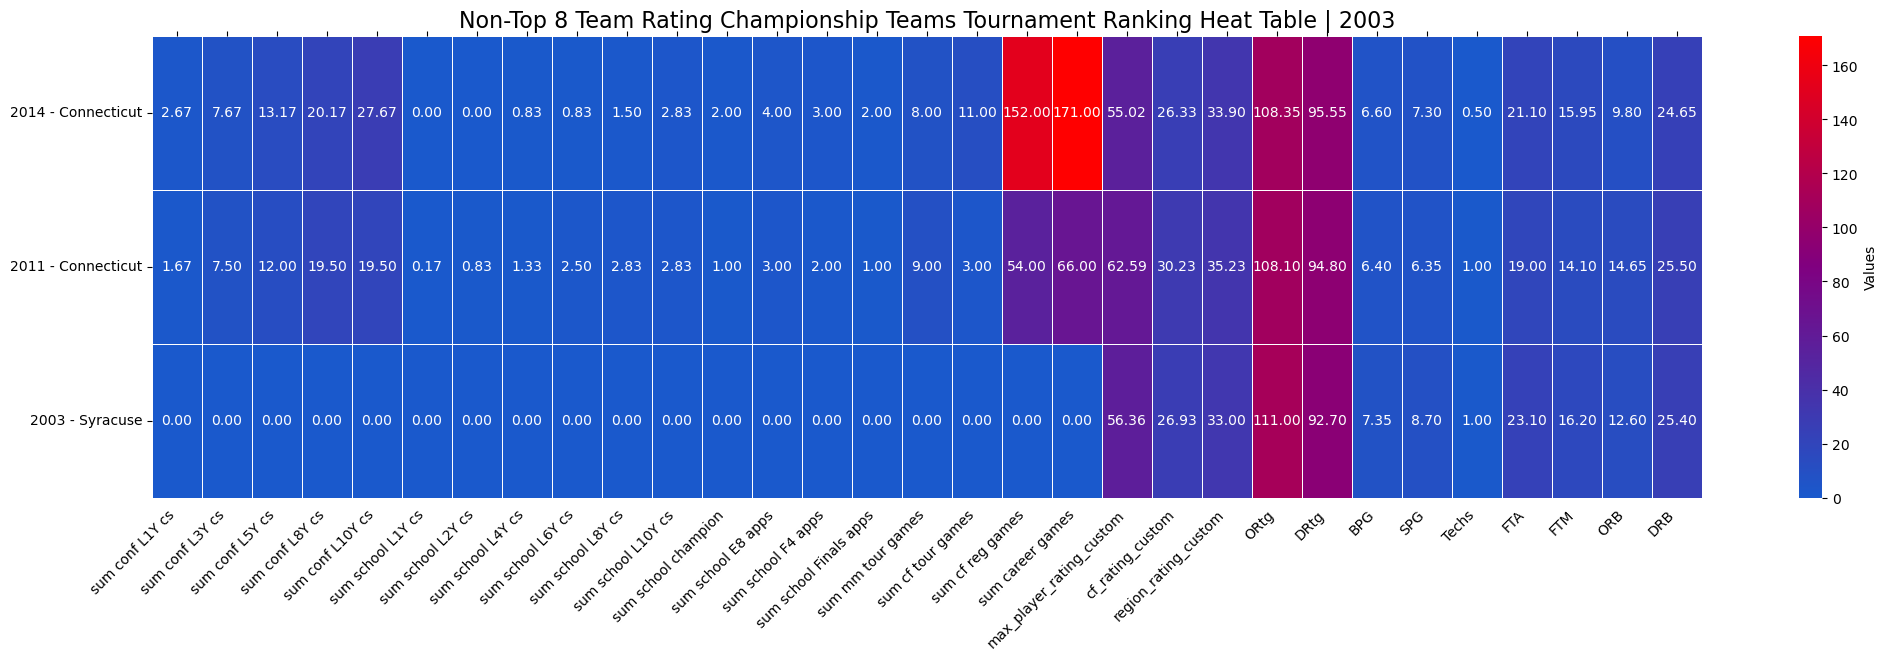

In [86]:
#df = pd.read_csv("NCAA Champion LR Data.csv")
df = pd.read_csv("NCAA Champion RawData.csv")

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageOps

teams_of_interest = ['Syracuse 2003', 'Connecticut 2011', 'Connecticut 2014']
champions_only = df[df['Team/Season'].isin(teams_of_interest)].copy()  

numeric_columns = ['sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L10Y cs',
                   'sum school L1Y cs', 'sum school L2Y cs', 'sum school L4Y cs', 'sum school L6Y cs', 'sum school L8Y cs', 
                   'sum school L10Y cs', 'sum school champion', 'sum school E8 apps', 'sum school F4 apps', 'sum school Finals apps',
                  'sum mm tour games', 'sum cf tour games', 'sum cf reg games', 'sum career games', 'max_player_rating_custom', 'cf_rating_custom', 
                   'region_rating_custom', 'ORtg', 'DRtg', 'BPG', 'SPG', 'Techs', 'FTA' ,'FTM', 'ORB','DRB']


custom_palette = sns.color_palette("pastel", as_cmap=True)

large_color = 'red'
middle_color = 'purple'
small_color = (0.1, 0.35, 0.8)

large_threshold = 1.5
middle_threshold = 0.5

colors = sns.color_palette([small_color, middle_color, large_color], as_cmap=True)
custom_cmap = sns.blend_palette(colors, as_cmap=True)

plt.figure(figsize=(25, 6))
heatmap = sns.heatmap(
    champions_only[numeric_columns],
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    linewidths=.5,
    cbar_kws={'label': 'Values'},
    vmin=champions_only[numeric_columns].min().min(),
    vmax=champions_only[numeric_columns].max().max()
)

championship_teams_labels = ['{} - {}'.format(season, team) for season, team in zip(champions_only['Season'], champions_only['Team'])]
plt.yticks(ticks=[i + 0.5 for i in range(len(championship_teams_labels))], labels=championship_teams_labels, rotation=0)

column_headers = numeric_columns
plt.xticks(ticks=[i + 0.5 for i in range(len(column_headers))], labels=column_headers, rotation=45, ha="right")

plt.tick_params(axis='x', which='both', bottom=False, top=True)

column_averages = champions_only[numeric_columns].mean()
print("Column Averages:")
print(column_averages)

plt.title('Non-Top 8 Team Rating Championship Teams Tournament Ranking Heat Table | 2003', fontsize=16)
plt.savefig("ht_champs_nt8_atr_values.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("ht_champs_nt8_atr_values.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("ht_champs_nt8_atr_values.png")
plt.show()